In [1]:
import pandas as pd
df=pd.read_csv("/home/nishanth/Downloads/archive/Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.drop_duplicates(inplace=True)
obj=df.select_dtypes(include='object')
for column in obj.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

/tmp/ipykernel_7164/182502123.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [4]:
num_data=df.select_dtypes(exclude='object')
for column in num_data.columns:
    df[column]=df[column].fillna(df[column].median())

In [5]:
from sklearn.preprocessing import LabelEncoder
for column in obj.columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])

In [7]:
x=df.drop('Salary', axis=1)
y=df['Salary']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

R2 Score = 93.48%
MAE = 9301.65
MSE = 148883434.18
RMSE = 12201.78


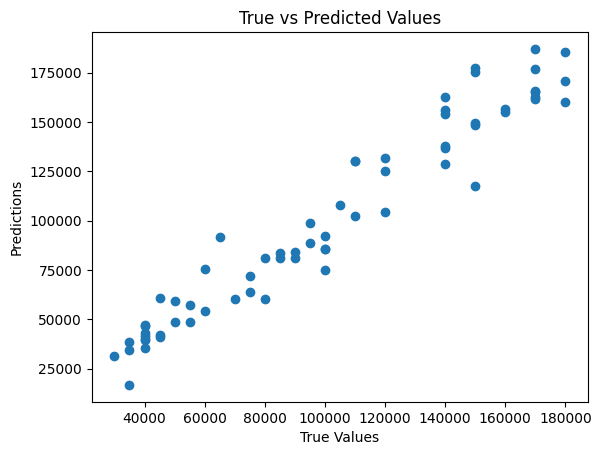

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"R2 Score = {r2_score(y_test, y_pred)*100:.2f}%")
print(f"MAE = {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

R2 Score = 94.58%
MAE = 8255.63
MSE = 123815484.42
RMSE = 11127.24


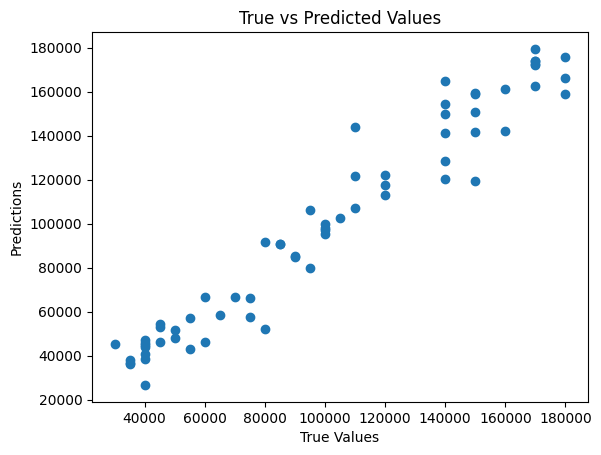

In [13]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_1=XGBRegressor()
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)
print(f"R2 Score = {r2_score(y_test, y_pred_1)*100:.2f}%")
print(f"MAE = {mean_absolute_error(y_test, y_pred_1):.2f}")
print(f"MSE = {mean_squared_error(y_test, y_pred_1):.2f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_1)):.2f}")

plt.scatter(y_test, y_pred_1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

In [14]:
import joblib
model_data={
    "model":model_1,
    "Label_encoder" :le,
    "scaler":scaler,
    "feature_names":df.columns.tolist()
}
joblib.dump(model_data, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']